<a href="https://colab.research.google.com/github/EricSiq/Natural_Language_Processing/blob/main/NLPLab16_7_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [13]:
#Text as list where each list is considered a document.
text = ["Lincoln freed many slaves Lincoln was President of USA",
        "USA is the fourth largest country in the world",
        "USA has coastline on the east and west"]

Tokenization

In [14]:
tokenized_text=[]
for sent in text:
    tokenized_text +=nltk.word_tokenize(sent)


In [15]:
tokenized_text

['Lincoln',
 'freed',
 'many',
 'slaves',
 'Lincoln',
 'was',
 'President',
 'of',
 'USA',
 'USA',
 'is',
 'the',
 'fourth',
 'largest',
 'country',
 'in',
 'the',
 'world',
 'USA',
 'has',
 'coastline',
 'on',
 'the',
 'east',
 'and',
 'west']

In [16]:
import string
def clean(tokens):
  tokens=[w.lower() for w in tokens]
  return tokens

In [17]:
cleaned_text=clean(tokenized_text)
cleaned_text

['lincoln',
 'freed',
 'many',
 'slaves',
 'lincoln',
 'was',
 'president',
 'of',
 'usa',
 'usa',
 'is',
 'the',
 'fourth',
 'largest',
 'country',
 'in',
 'the',
 'world',
 'usa',
 'has',
 'coastline',
 'on',
 'the',
 'east',
 'and',
 'west']

Count Vectorizer

In [18]:
vocab={}
for token in cleaned_text:
  if token not in vocab:
    vocab[token]=1
  else:
    vocab[token]+=1

In [19]:
vocab

{'lincoln': 2,
 'freed': 1,
 'many': 1,
 'slaves': 1,
 'was': 1,
 'president': 1,
 'of': 1,
 'usa': 3,
 'is': 1,
 'the': 3,
 'fourth': 1,
 'largest': 1,
 'country': 1,
 'in': 1,
 'world': 1,
 'has': 1,
 'coastline': 1,
 'on': 1,
 'east': 1,
 'and': 1,
 'west': 1}

Create Vectors


In [20]:
rows=[]
for doc in text:
  vector=[0]*len(vocab)
  for word in clean(nltk.word_tokenize(doc)):
    vector[list(vocab.keys()).index(word)] +=1
  rows.append(vector)

In [21]:
print(cleaned_text)

['lincoln', 'freed', 'many', 'slaves', 'lincoln', 'was', 'president', 'of', 'usa', 'usa', 'is', 'the', 'fourth', 'largest', 'country', 'in', 'the', 'world', 'usa', 'has', 'coastline', 'on', 'the', 'east', 'and', 'west']


In [12]:
print(rows)

[[2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]]


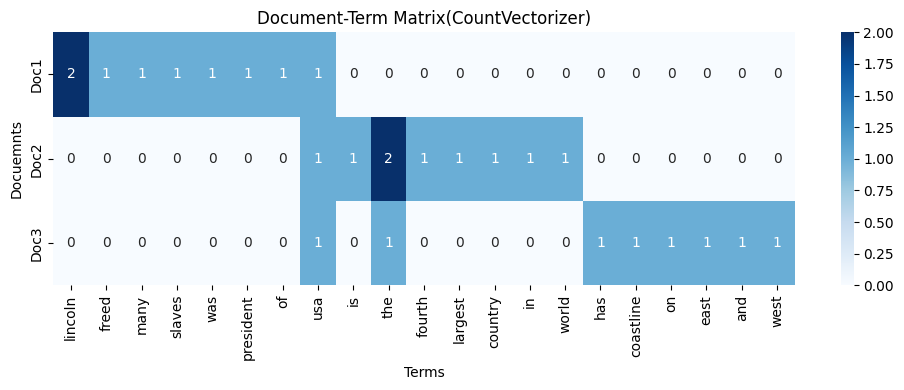

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(rows,annot=True,cmap="Blues",xticklabels=vocab.keys(),
            yticklabels=[f'Doc{i+1}' for i in range(len(text))])
plt.title("Document-Term Matrix(CountVectorizer)")
plt.xlabel("Terms")
plt.ylabel("Docuemnts")
plt.tight_layout()
plt.show()

skelarn countvectorizor

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
countvec=CountVectorizer()
countvec_vector=countvec.fit_transform(text)
print(countvec_vector.toarray())


[[0 0 0 0 0 1 0 0 0 0 2 1 1 0 1 1 0 1 1 0 0]
 [0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 2 1 0 0 1]
 [1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0]]


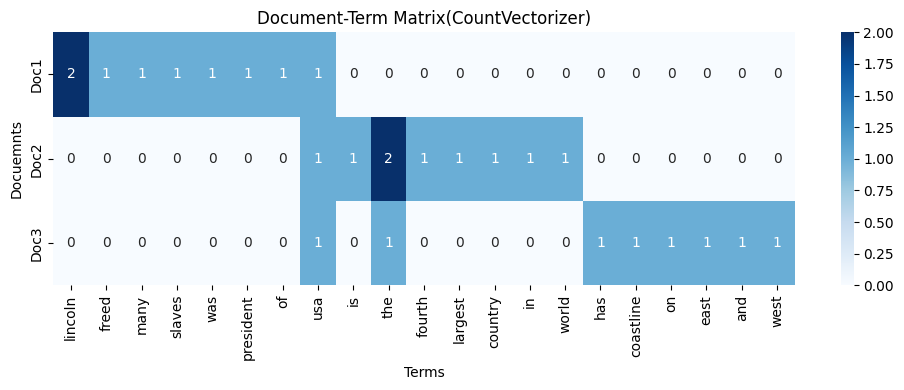

In [27]:
plt.figure(figsize=(10,4))
sns.heatmap(rows,annot=True,cmap="Blues",xticklabels=vocab.keys(),
            yticklabels=[f'Doc{i+1}' for i in range(len(text))])
plt.title("Document-Term Matrix(CountVectorizer)")
plt.xlabel("Terms")
plt.ylabel("Docuemnts")
plt.tight_layout()
plt.show()

In [29]:
df={} #For document frequency calculation
vocab={}

for doc in text:
  tokens=set(clean(nltk.word_tokenize(doc)))
  for token in tokens:
    df[token]=df.get(token,0)+1 #df.get(token,0) returns count if word pre

  for idx, token in enumerate(sorted(df.keys())):
    vocab[token]=idx

In [30]:
vocab

{'freed': 5,
 'lincoln': 10,
 'many': 11,
 'of': 12,
 'president': 14,
 'slaves': 15,
 'usa': 17,
 'was': 18,
 'country': 2,
 'fourth': 4,
 'in': 7,
 'is': 8,
 'largest': 9,
 'the': 16,
 'world': 20,
 'and': 0,
 'coastline': 1,
 'east': 3,
 'has': 6,
 'on': 13,
 'west': 19}

In [31]:
df

{'many': 1,
 'usa': 3,
 'slaves': 1,
 'was': 1,
 'of': 1,
 'freed': 1,
 'president': 1,
 'lincoln': 1,
 'fourth': 1,
 'in': 1,
 'largest': 1,
 'world': 1,
 'country': 1,
 'is': 1,
 'the': 2,
 'on': 1,
 'coastline': 1,
 'east': 1,
 'and': 1,
 'has': 1,
 'west': 1}

Calculate Inverse Document Frequency(IDF)

In [33]:
#IDF=log(1+Total Number of Doc/1+Number of Doc containing word) +1
N=len(text)
import math
idf=[]
for token in vocab:
  doc_freq=df[token]
  numerator=1+N
  denominator = 1+ doc_freq
  idf_score=math.log(numerator/denominator)+1
  idf.append(idf_score)

In [34]:
print(idf)

[1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.0, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.2876820724517808, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454, 1.6931471805599454]


In [38]:
#Calculate TFIDF
tfidf_matrix=[]
for doc in text:
    tokens=clean(nltk.word_tokenize(doc))
    tf=[0]*len(vocab)
    for word in tokens:
      if word in vocab:
        tf[vocab[word]]+=1
    tfidf_vector=[tf[i]*idf[i] for i in range(len(tf))]
    tfidf_matrix.append(tfidf_vector)

In [39]:
tfidf_matrix

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.6931471805599454,
  0.0,
  0.0,
  0.0,
  0.0,
  3.386294361119891,
  1.6931471805599454,
  1.6931471805599454,
  0.0,
  1.6931471805599454,
  1.6931471805599454,
  0.0,
  1.6931471805599454,
  1.6931471805599454,
  0.0,
  0.0],
 [0.0,
  0.0,
  1.6931471805599454,
  0.0,
  1.6931471805599454,
  0.0,
  0.0,
  1.6931471805599454,
  1.6931471805599454,
  1.6931471805599454,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.386294361119891,
  1.6931471805599454,
  0.0,
  0.0,
  1.6931471805599454],
 [1.6931471805599454,
  1.6931471805599454,
  0.0,
  1.6931471805599454,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.2876820724517808,
  0.0,
  0.0,
  1.6931471805599454,
  1.6931471805599454,
  0.0,
  1.6931471805599454,
  0.0]]

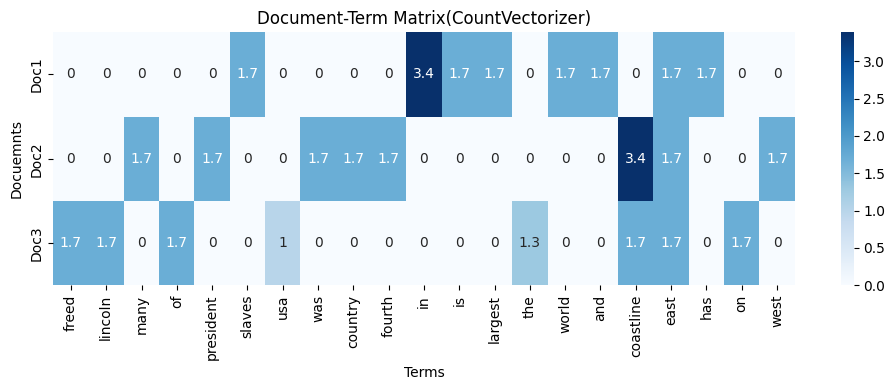

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(tfidf_matrix,annot=True,cmap="Blues",xticklabels=vocab.keys(),
            yticklabels=[f'Doc{i+1}' for i in range(len(text))])
plt.title("Document-Term Matrix(CountVectorizer)")
plt.xlabel("Terms")
plt.ylabel("Docuemnts")
plt.tight_layout()
plt.show()

In [41]:
#TFIDF using sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(norm=None)
tfidf_vector=tfidf.fit_transform(text)

In [43]:
tfidf_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24 stored elements and shape (3, 21)>

In [42]:
plt.figure(figsize=(10,4))
sns.heatmap(tfidf_vector,annot=True,cmap="Blues",xticklabels=vocab.keys(),
            yticklabels=[f'Doc{i+1}' for i in range(len(text))])
plt.title("Document-Term Matrix(CountVectorizer)")
plt.xlabel("Terms")
plt.ylabel("Docuemnts")
plt.tight_layout()
plt.show()

ValueError: Must pass 2-d input. shape=()

<Figure size 1000x400 with 0 Axes>